In [1]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Instalar o pacote devtools, se ainda não estiver instalado
robjects.r('install.packages("devtools")')

# Carregar o pacote devtools
robjects.r('library(devtools)')

# Instalar o pacote mananciais
robjects.r('devtools::install_github("beatrizmilz/mananciais")')

# Carregar o pacote mananciais
robjects.r('library(mananciais)')

# Chamar a função dados_mananciais
robjects.r('mananciais <- mananciais::dados_mananciais()')

# Obter o dataframe em Python
mananciais_py = robjects.r('mananciais')

# Converter o dataframe R para um dataframe Pandas
mananciais_df = pandas2ri.rpy2py(mananciais_py) 

# Converter a coluna "Data" para datetime
mananciais_df['data'] = pd.to_datetime(mananciais_df['data'], unit='D', origin='1970-01-01')

# Filtrar para manter apenas dados de 01/01/2013 em diante.
filtro = mananciais_df['data'] > '2012-12-31'
dados_apos_2013 = mananciais_df[filtro]

# Salvar arquivo baixado e modificado em um csv.
dados_apos_2013.to_csv('mananciaisfiltrado.csv', index=False)

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Converter a coluna 'data' para datetime
dados_apos_2013['data'] = pd.to_datetime(dados_apos_2013['data'])

# Extrair o ano da coluna 'data'
dados_apos_2013['ano'] = dados_apos_2013['data'].dt.year

c:\Users\gabri\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


--- Please select a CRAN mirror for use in this session ---


R[write to console]: trying URL 'https://brieger.esalq.usp.br/CRAN/bin/windows/contrib/4.3/devtools_2.4.5.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 436038 bytes (425 KB)

R[write to console]: downloaded 425 KB




package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gabri\AppData\Local\Temp\Rtmpwt6aIH\downloaded_packages


R[write to console]: Carregando pacotes exigidos: usethis

R[write to console]: Downloading GitHub repo beatrizmilz/mananciais@HEAD



These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                          
2: CRAN packages only           
3: None                         
4: dplyr (1.1.3 -> 1.1.4) [CRAN]

-- R CMD build -----------------------------------------------------------------
* checking for file 'C:\Users\gabri\AppData\Local\Temp\Rtmpwt6aIH\remotes81183dc0ff2\beatrizmilz-mananciais-8b6bc7c/DESCRIPTION' ... OK
* preparing 'mananciais':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building 'mananciais_0.0.0.9000.tar.gz'



C:\Users\gabri\AppData\Local\Temp\ipykernel_33048\1474811612.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ano', y='volume_operacional', hue='sistema', data=dados_apos_2013, palette='tab10', ci=None, edgecolor="0.1")


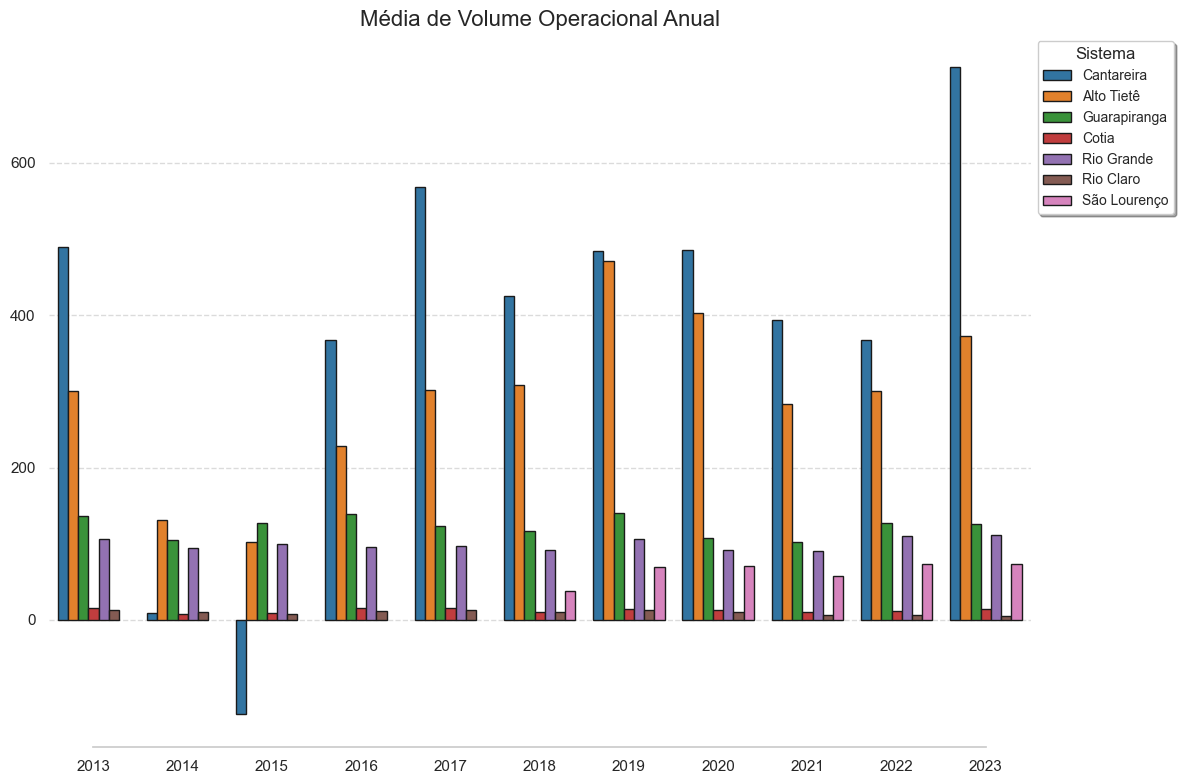

In [11]:
# Grafico Barras

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Converter a coluna 'data' para datetime
dados_apos_2013['data'] = pd.to_datetime(dados_apos_2013['data'])

# Extrair o ano da coluna 'data'
dados_apos_2013['ano'] = dados_apos_2013['data'].dt.year

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Criar gráfico de barras empilhadas verticalmente
plt.figure(figsize=(12, 8))  # Ajustar o tamanho do gráfico

# Adicionar bordas mais escuras às barras
sns.barplot(x='ano', y='volume_operacional', hue='sistema', data=dados_apos_2013, palette='tab10', ci=None, edgecolor="0.1")

plt.ylabel('Volume Operacional', fontsize=12)  # Adicionar rótulo do eixo y
plt.title('Média de Volume Operacional Anual', fontsize=16)  # Aumentar o tamanho do título

# Colocar a legenda dentro do gráfico e ajustar estilo
plt.legend(title='Sistema', loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, fontsize=10)

# Adicionar grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remover bordas desnecessárias
sns.despine(trim=True, left=True)

# Remover o rótulo do eixo x e y
plt.xlabel('')
plt.ylabel('')

# Ajustar layout para evitar cortar o título
plt.tight_layout()

# Salvar o gráfico
plt.savefig('Barras.png') 

# Corrigir a mensagem de aviso
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_33048\4294541343.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='pluviometria_mensal', y='volume_operacional', data=dados_apos_2013, alpha=0.7, edgecolor='w', linewidth=0.5, palette='pastel')


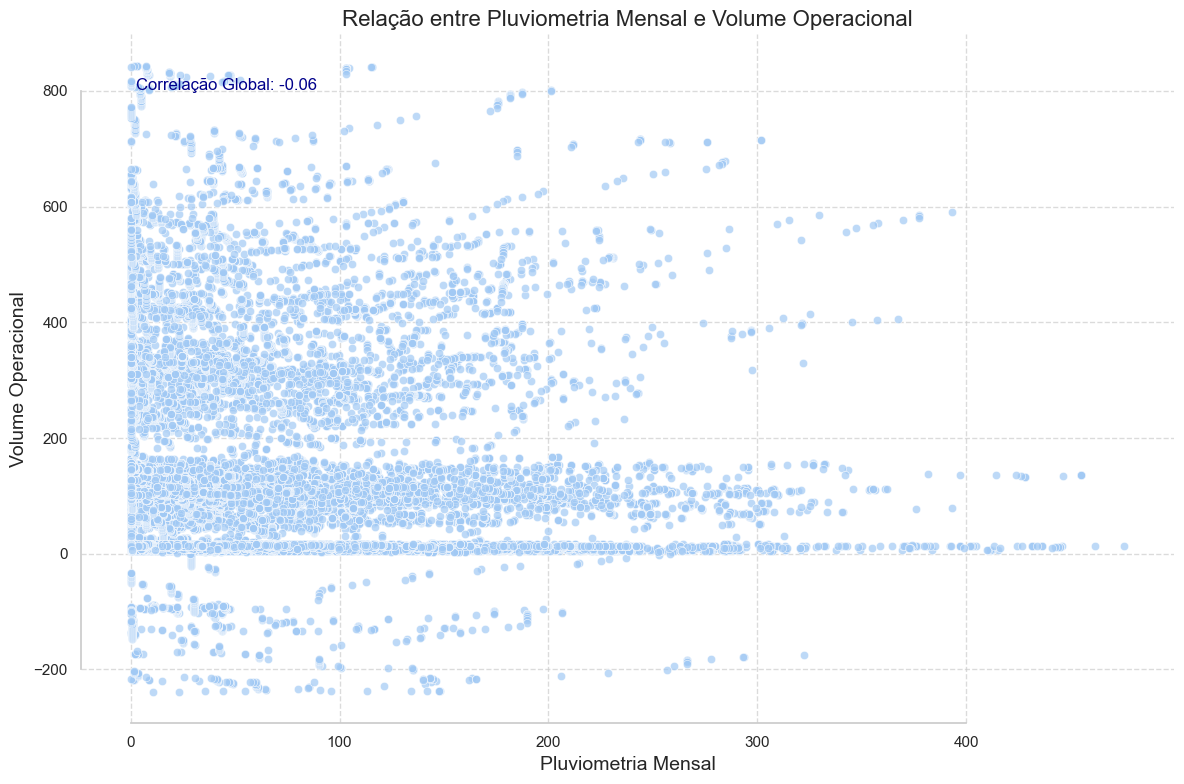

In [7]:
# Gerar Dispersão

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Criar gráfico de dispersão sem linha de tendência
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='pluviometria_mensal', y='volume_operacional', data=dados_apos_2013, alpha=0.7, edgecolor='w', linewidth=0.5, palette='pastel')

plt.xlabel('Pluviometria Mensal', fontsize=14)
plt.ylabel('Volume Operacional', fontsize=14)
plt.title('Relação entre Pluviometria Mensal e Volume Operacional', fontsize=16)

# Adicionar grade para facilitar a leitura
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Calcular a correlação global
correlation = dados_apos_2013['pluviometria_mensal'].corr(dados_apos_2013['volume_operacional'])

# Adicionar anotação sobre a correlação
plt.annotate(f'Correlação Global: {correlation:.2f}', xy=(0.05, 0.92), xycoords='axes fraction', fontsize=12, color='darkblue')

# Ajustar layout para evitar cortar o título
plt.tight_layout()

# Remover bordas desnecessárias
sns.despine(trim=True)

# Salvar o gráfico
plt.savefig('Dispersão.png')

plt.show()

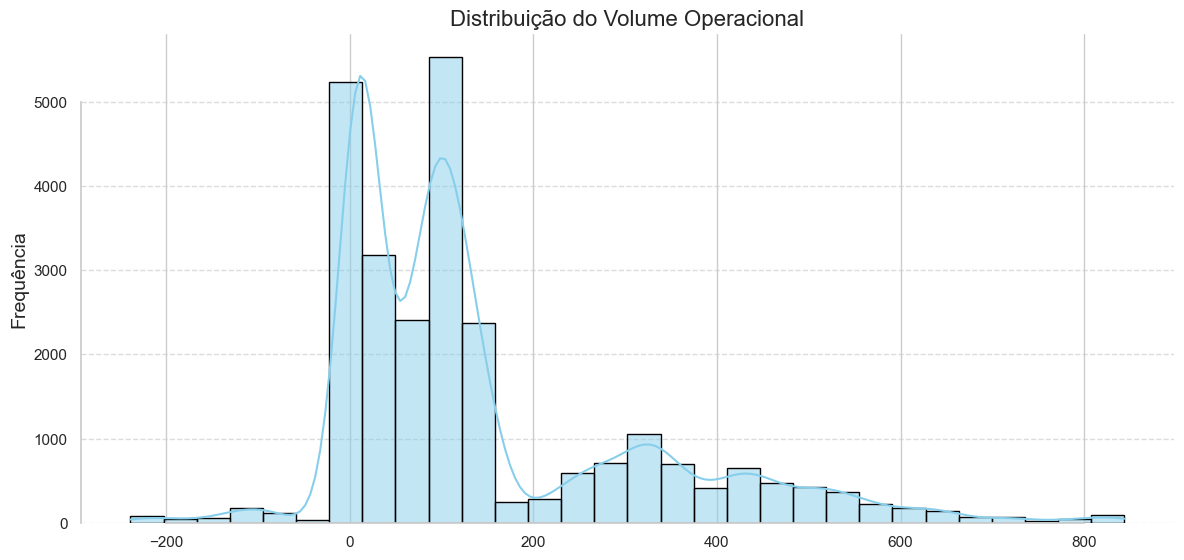

In [9]:
# Gerar Histograma

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Criar histograma
plt.figure(figsize=(12, 6))
histogram = sns.histplot(dados_apos_2013['volume_operacional'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.xlabel('Volume Operacional', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Distribuição do Volume Operacional', fontsize=16)

# Adicionar grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout para evitar cortar o título
plt.tight_layout()

# Remover o rótulo do eixo x
plt.xlabel('')

# Remover bordas desnecessárias
sns.despine(trim=True)

# Salvar o gráfico
plt.savefig('Histograma.png')

plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_33048\1184016031.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(x='sistema', y='volume_operacional', data=dados_apos_2013, palette='pastel')


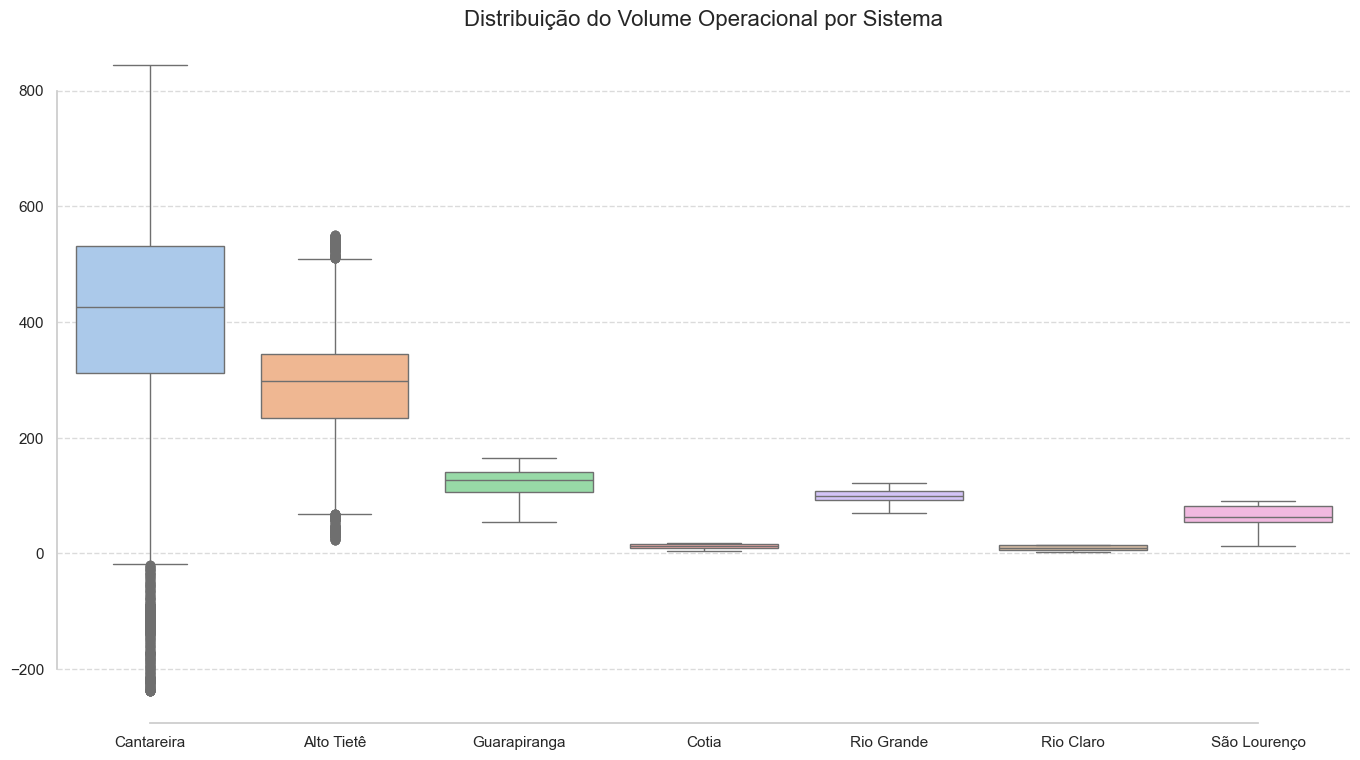

In [10]:
# Gerar Boxspot

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Configurações estéticas do Seaborn
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Criar gráfico de boxplot
plt.figure(figsize=(14, 8))
box_plot = sns.boxplot(x='sistema', y='volume_operacional', data=dados_apos_2013, palette='pastel')

plt.xlabel('Sistema', fontsize=14)
plt.ylabel('Volume Operacional', fontsize=14)
plt.title('Distribuição do Volume Operacional por Sistema', fontsize=16)

# Adicionar grade para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout para evitar cortar o título
plt.tight_layout()

# Remover o rótulo do eixo x e y
plt.xlabel('')
plt.ylabel('')

# Remover bordas desnecessárias
sns.despine(trim=True)

# Salvar o gráfico
plt.savefig('Boxspot.png') 

plt.show()

In [15]:
# Gerar Tabela

# Carregar a base de dados
dados_apos_2013 = pd.read_csv('mananciaisfiltrado.csv')

# Converter a coluna 'data' para datetime
dados_apos_2013['data'] = pd.to_datetime(dados_apos_2013['data'])

# Extrair o ano da coluna 'data'
dados_apos_2013['ano'] = dados_apos_2013['data'].dt.year

# Função para calcular estatísticas descritivas e renomear colunas
def calcular_estatisticas(coluna):
    return dados_apos_2013.groupby('ano')[coluna].agg(['mean', 'std', 'min', 'max']).reset_index()

# Calcular estatísticas para 'volume_operacional'
tabela_volume = calcular_estatisticas('volume_operacional')
tabela_volume.columns = ['Ano', 'Média', 'Desvio Padrão', 'Mínimo', 'Máximo']

# Calcular estatísticas para 'pluviometria_mensal'
tabela_pluviometria = calcular_estatisticas('pluviometria_mensal')
tabela_pluviometria.columns = ['Ano', 'Média', 'Desvio Padrão', 'Mínima', 'Máxima']

# Formatando as tabelas
tabela_volume = (
    tabela_volume
    .style
    .format({
        'Médio': '{:.2f}',
        'Desvio Padrão': '{:.2f}',
        'Mínimo': '{:.2f}',
        'Máximo': '{:.2f}'
    })
    .set_caption('Volume Operacional')
    .set_table_styles([{'selector': 'caption', 'props': [('text-align', 'center')]}])
)

tabela_pluviometria = (
    tabela_pluviometria
    .style
    .format({
        'Média': '{:.2f}',
        'Desvio Padrão': '{:.2f}',
        'Mínima': '{:.2f}',
        'Máxima': '{:.2f}'
    })
    .set_caption('Pluviometria Mensal')
    .set_table_styles([{'selector': 'caption', 'props': [('text-align', 'center')]}])
)

# Exibir as tabelas
display(tabela_volume)
display(tabela_pluviometria)

,Ano,Média,Desvio Padrão,Mínimo,Máximo
0,2013,176.556810,175.37,6.82,627.84
1,2014,59.714332,84.08,-221.80,267.52
2,2015,36.894197,88.86,-238.84,157.66
3,2016,142.770975,134.11,6.57,468.66
4,2017,186.504748,199.39,9.34,667.95
5,2018,144.245098,152.96,4.76,533.69
6,2019,185.347767,193.49,6.91,576.84
7,2020,168.860473,185.31,5.99,632.23
8,2021,134.957697,141.80,4.87,518.82
9,2022,142.062600,132.00,4.75,445.65


,Ano,Média,Desvio Padrão,Mínima,Máxima
0,2013,64.45,74.16,0.00,445.10
1,2014,51.89,62.05,0.00,309.90
2,2015,74.18,70.49,0.00,322.40
3,2016,63.41,65.55,0.00,302.00
4,2017,64.79,72.22,0.00,455.20
5,2018,54.76,56.82,0.00,348.40
6,2019,75.68,75.31,0.00,475.80
7,2020,55.70,70.38,0.00,361.00
8,2021,46.18,52.21,0.00,307.60
9,2022,62.86,69.87,0.00,393.20
